## Assignment 2 - Clustering

## Learning Outcomes

In this assignment, you will do the following:

* Explore a dataset and carry out clustering using k-means algorithm

* Identify the optimum number of clusters for a given dataset



## Problem Description

In this assignment, you will study the electricity demand from clients in Portugal, during 2013 and 2014. You have been provided with the data file, which you should download when you download this assignment file.

The data$^1$ available contains 370 time series, corresponding to the electric demand$^2$ for 370 clients, between 2011 and 2014. 

In this guided exercise, you will use clustering techniques to understand the typical usage behaviour during 2013-2014.

Both these datasets are publicly available, and can be used to carry out experiments. Their source is below:

 1. Data:
https://archive.ics.uci.edu/ml/datasets/ElectricityLoadDiagrams20112014#

 2. Electric Demand:
http://www.think-energy.net/KWvsKWH.htm

We will start by exploring the data set and continue on to the assignment.  Consider this as a working notebook, you will add your work to the same notebook.

In this assignment we will use the sklearn package for k-means.  Please refer here for the documentation https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

The sklearn package for k-means is one of the many clustering algorithms found in the module "sklearn.cluster".  These come with a variety of functions that you can call by importing the package.

For example 
    
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.cluster import KMeans



## Data Preparation

Start by downloading the data to a local directory and modify the "pathToFile" and "fileName" variables, if needed. The data file has been provided with this assignment. It is also available at the links provided above.

In [115]:
pathToFile = r"C:\\Users\\jacey\\Documents\\Machine Learning Data Science\\assignment-2.html\\media\\documents\\"
fileName = 'LD2011_2014.txt'

 # pathToFile = r"C:\\Users\\<your username>\\Downloads\\"

In [116]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
random.seed(42)

In [117]:
# Replace "," by ".", otherwise the numbers will be in the form 2,3445 instead of 2.3445
import fileinput

with fileinput.FileInput(pathToFile+fileName, inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace(",", "."), end='')

In [118]:
# Create dataframe
import pandas as pd
data = pd.read_csv(pathToFile+fileName, sep=";", index_col=0)

### Quick data inspection

In [119]:
data.head(2)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
data.tail(2)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.17524,225.589226,64.685315,72.043011,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541
2015-01-01 00:00:00,2.538071,19.914651,1.737619,178.861789,84.146341,279.761905,10.17524,249.158249,62.937063,69.892473,...,188.436831,27800.0,1409.282700,954.545455,27.379400,4.095963,628.621598,131.886477,673.020528,7135.135135


In [121]:
data.shape

(140256, 370)

#### As it can be seen, the dataframe contains a row for each interval of 15 minutes between Jan 1, 2011 to Dec 31 2014. There are 370 columns corresponding 370 clients. The dataframe is indexed by the timestamp.

Since the frequency is 15 minutes, each day provides $24\times 4 = 96$ datapoints, which multiplied by 365 days and 4 years (plus 1 day in Feb 29, 2012) gives: $96 \times 365 \times 4 + 96 = 140256$, as observed in data.shape

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0+ MB


In [123]:
data.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309,141.227385,4.521338,191.401476,39.975354,42.205152,...,218.213701,37607.987537,1887.427366,2940.031734,65.413150,9.269709,424.262904,94.704717,625.251734,8722.355145
std,5.983965,13.272415,11.014456,58.248392,26.461327,98.439984,6.485684,121.981187,29.814595,33.401251,...,204.833532,38691.954832,1801.486488,2732.251967,65.007818,10.016782,274.337122,80.297301,380.656042,9195.155777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659,71.428571,0.565291,111.111111,13.986014,9.677419,...,5.710207,0.000000,0.000000,0.000000,13.037810,0.000000,0.000000,30.050083,83.944282,0.000000
50%,1.269036,24.893314,1.737619,87.398374,39.024390,157.738095,2.826456,222.222222,40.209790,40.860215,...,131.334761,24100.000000,1050.632911,2136.363636,31.290743,7.021650,525.899912,76.794658,758.064516,0.000000
75%,2.538071,29.871977,1.737619,115.853659,54.878049,205.357143,4.522329,279.461279,57.692308,61.290323,...,403.283369,54800.000000,3312.236287,5363.636364,108.213820,11.702750,627.743635,151.919866,875.366569,17783.783784
max,48.223350,115.220484,151.172893,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,198.924731,...,852.962170,192800.000000,7751.054852,12386.363636,335.071708,60.269163,1138.718174,362.270451,1549.120235,30918.918919


### Plot the first 2 days of 2012 for the first 2 clients

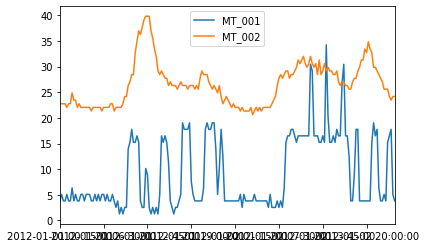

In [124]:
data_example = data.loc['2012-01-01 00:15:00':'2012-01-03 00:00:00'][['MT_001','MT_002']]
data_example.plot()
plt.show()

#### We  note that the main difference between the curves is the level (also seen on the means in df.describe()).  We know we will have to somehow normalize the curves, in order for the clustering technique to capture the behaviour of the consumption throughout the day.

### Data for the analysis

We focus on 2013 and 2014 because these are the years with low number of clients having zero demand

In [125]:
data2011 = data.loc['2011-01-01 00:15:00':'2012-01-01 00:00:00']
data2012 = data.loc['2012-01-01 00:15:00':'2013-01-01 00:00:00']
data2013 = data.loc['2013-01-01 00:15:00':'2014-01-01 00:00:00']
data2014 = data.loc['2014-01-01 00:15:00':'2015-01-01 00:00:00']

In [126]:
# Check number of days
print(data2011.shape[0]/96)
print(data2012.shape[0]/96)
print(data2013.shape[0]/96)
print(data2014.shape[0]/96)

365.0
366.0
365.0
365.0


In [127]:
# See number of clients with 0 demand per year
print(sum(data2011.mean()==0))
print(sum(data2012.mean()==0))
print(sum(data2013.mean()==0))
print(sum(data2014.mean()==0))

210
37
21
1


In [128]:
clients = data2011.columns
clients_no_demand = clients[data2013.mean()==0] # clients with 0 demand
data_13_14 = data2013.append(data2014) # appending 2013 and 2014
data_13_14 = data_13_14.drop(clients_no_demand, axis=1) # drop clients with 0 demand
print(data_13_14.shape)
print(sum(data_13_14.mean()==0)) # check that there are no clients with 0 demand

(70080, 349)
0


## Getting average curves per client

In [129]:
data = data_13_14.copy() # weekdays weekends, data2011, data2012, data2013, data2014

In [130]:
data['hour'] = data.index.map(lambda x: x[11:])  #create a new column, parse out the hour

In [131]:
data.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,hour
2013-01-01 00:15:00,2.538071,22.759602,2.606429,138.211382,63.414634,255.952381,4.522329,239.057239,57.692308,78.494624,...,22300.0,886.075949,1000.000000,16.949153,6.436513,616.330114,76.794658,731.671554,8086.486486,00:15:00
2013-01-01 00:30:00,1.269036,22.759602,2.606429,138.211382,63.414634,264.880952,5.652911,228.956229,57.692308,76.344086,...,21000.0,864.978903,909.090909,18.252934,3.510825,564.530290,76.794658,727.272727,8086.486486,00:30:00
2013-01-01 00:45:00,2.538071,22.759602,2.606429,134.146341,60.975610,250.000000,5.652911,239.057239,54.195804,76.344086,...,18200.0,860.759494,840.909091,16.949153,5.851375,590.869183,68.447412,730.205279,7848.648649,00:45:00
2013-01-01 01:00:00,1.269036,23.470839,2.606429,130.081301,56.097561,226.190476,6.218202,249.158249,50.699301,75.268817,...,15800.0,860.759494,840.909091,16.949153,4.095963,575.065847,58.430718,722.873900,7848.648649,01:00:00
2013-01-01 01:15:00,3.807107,23.470839,2.606429,130.081301,58.536585,229.166667,6.783493,239.057239,57.692308,74.193548,...,15000.0,793.248945,818.181818,16.949153,4.095963,570.676032,60.100167,748.533724,7610.810811,01:15:00


### Getting average curves per client

In [132]:
datagrouped = data.groupby("hour")
average_curves = datagrouped.agg("mean")
average_curves.shape  #aggregate to different time period or every 15 mins, average every days usage, how was the usage by clients

(96, 349)

#### The dataframe average_curves contains the 349 typical weekday electric demands

#### We now divide each curve by its mean, so that all curves have mean 1

In [133]:
average_curves.mean()


MT_001        5.191112
MT_002       28.106884
MT_003        1.954785
MT_004      114.508535
MT_005       50.884390
              ...     
MT_366       12.144033
MT_367      556.904701
MT_368      127.032402
MT_369      820.311872
MT_370    17456.658722
Length: 349, dtype: float64

In [134]:
average_curves_norm = average_curves/(average_curves.mean()) # usage weighted over overall usage of one customer

#### Plot the first 2 and last 2 clients

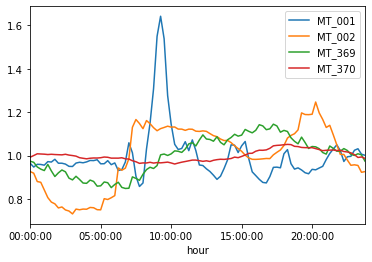

In [135]:
average_curves_norm[['MT_001','MT_002','MT_369','MT_370']].plot()
plt.show()

## Clustering Analysis on the average normalized curves

In [136]:
X = average_curves_norm.copy()  # We call this normalized curve

X = np.array(X.T) # put it on the right format

# Questions (15 marks total)

**Q1: (7 marks)**

a. Determine what a convenient number of clusters. Justify your choice.  Make use of the sklearn's package for k-means for this. You may refer to the module to figure out how to come up with the optimal number of clusters. 

b. Make a plot for each cluster, that includes:
    - The number of clients in the cluster (you can put this in the title of the plot)
    - All the curves in the cluster
    - The curve corresponding to the center of the cluster (make this curve thicker to distinguish it from the individual curves).  The center is also sometimes referred to as "centroid".
    
You have 2 separate plots for each cluster if you prefer (one for the individual curves, one for the centroid)

In [137]:
ssqd1 = []
K = range(1,18)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    ssqd1.append(km.inertia_)

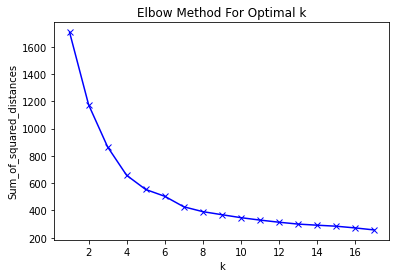

In [138]:
plt.plot(K, ssqd1, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Conclusion: # of optimal clusters is 5.

In [139]:
km1 = KMeans(n_clusters=5)
y_pred1 = km1.fit_predict(X)
centers = km1.cluster_centers_
center_df = pd.DataFrame(centers).T
center_df.set_index(average_curves_norm.index, inplace=True)

In [140]:
df1 = pd.DataFrame(X, columns=average_curves_norm.index)#$#,y_kmeans,index=False)
df1.set_index(average_curves_norm.columns, inplace=True)
df1['Cluster']=y_pred1

In [141]:
clients_in_cluster0=sum(y_pred1==0)
clients_in_cluster1=sum(y_pred1==1)
clients_in_cluster2=sum(y_pred1==2)
clients_in_cluster3=sum(y_pred1==3)
clients_in_cluster4=sum(y_pred1==4)
print("# of clients in cluster 0 has ",clients_in_cluster0)
print("# of clients in cluster 1 has ",clients_in_cluster1)
print("# of clients in cluster 2 has ",clients_in_cluster2)
print("# of clients in cluster 3 has ",clients_in_cluster3)
print("# of clients in cluster 4 has ",clients_in_cluster4)

# of clients in cluster 0 has  201
# of clients in cluster 1 has  4
# of clients in cluster 2 has  109
# of clients in cluster 3 has  1
# of clients in cluster 4 has  34


Text(0.5, 0.98, '4 Clusters')

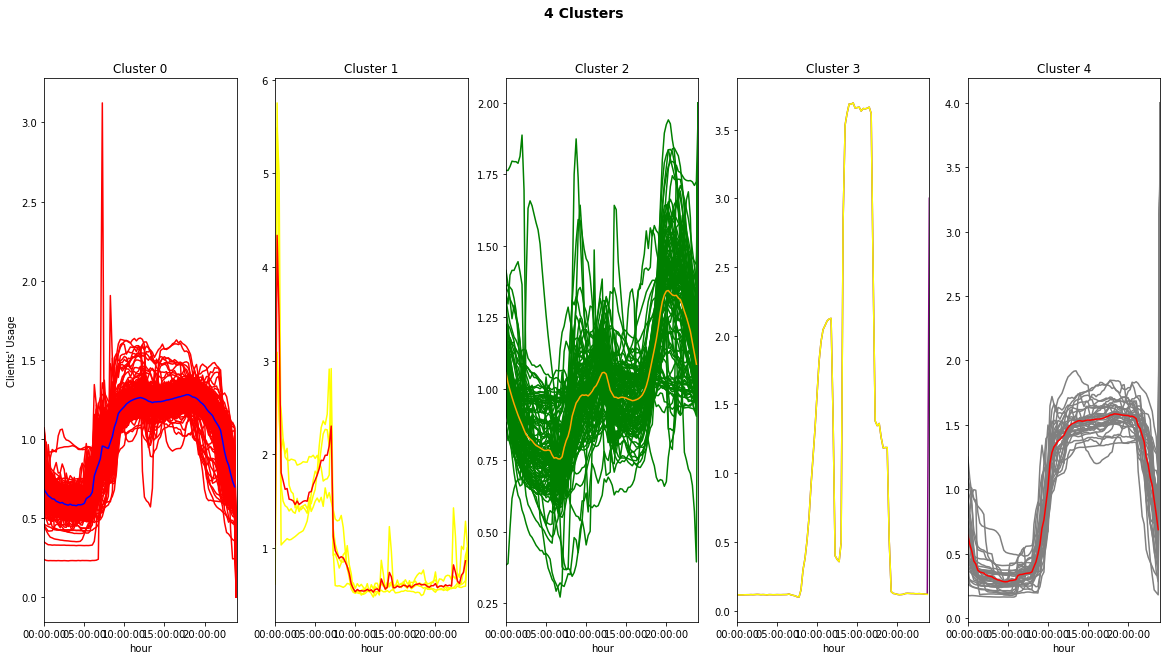

In [142]:
#Plot the 5 clusters for all clients and centroids with different color in each
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,5,1)

#fig, ((ax1, ax2), (ax3, ax4),) = plt.subplots(nrows=3, ncols=2)
df1[df1['Cluster']==0].T.plot.line(color='red', legend=False, ax=ax)
center_df[[0]].plot.line(color='blue', ax=ax, legend=False)

ax2=fig.add_subplot(1,5,2)
df1[df1['Cluster']==1].T.plot.line(color='yellow', legend=False, ax=ax2)
center_df[[1]].plot.line(color='red', ax=ax2, legend=False)

ax3=fig.add_subplot(1,5,3)
df1[df1['Cluster']==2].T.plot.line(color='green', legend=False, ax=ax3)
center_df[[2]].plot.line(color='orange', ax=ax3, legend=False)

ax4=fig.add_subplot(1,5,4)
df1[df1['Cluster']==3].T.plot.line(color='purple', legend=False, ax=ax4)
center_df[[3]].plot.line(color='yellow', ax=ax4, legend=False)

ax5=fig.add_subplot(1,5,5)
df1[df1['Cluster']==4].T.plot.line(color='grey', legend=False, ax=ax5)
center_df[[4]].plot.line(color='red', ax=ax5, legend=False)



ax.set_title("Cluster 0")
ax2.set_title("Cluster 1")
ax3.set_title("Cluster 2")
ax4.set_title("Cluster 3")
ax5.set_title("Cluster 4")
ax.set_ylabel("Clients' Usage")
plt.suptitle(("4 Clusters"),
fontsize=14, fontweight='bold')

**Q2: (8 marks)**

In this exercise you work with the daily curves of 1 single client.
First, create a list of arrays, each array containing a curve for a day. You may use X from the cells above.
    X = average_curves_norm.copy() 
The list contains 730 arrays, one for each of the days of 2013 and 2014.

a. Determine the optimal value of k ( number of clusters). This time you may also perform silhoutte analysis as stated in the module. Carrying out silhoutte analysis is left as an exercise. What do you understand about the clusters? 

b. Based on your results from your analyses of both methods, what do understand?  Interpret it perhaps with different perspectives of timelines like weeks or months.

#### The following cell generates a list of all the days in the two years 2013-2014, which is helpful to answer part (b).  The cells below are only to give you a headstart.  You may or may not use these and come up with your own interpretation.


In [143]:
client = 'MT_022'
oneClient = data_13_14[client]
X2 = [] # a list of arrays, each array being a normalized curve for a day
for J in range(2*365):
    X2.extend([np.array(oneClient[J*96:(J+1)*96])/np.mean(oneClient[J*96:(J+1)*96])])# normalize data

In [144]:
from datetime import date, timedelta

d1 = date(2013, 1, 1)  # start date
d2 = date(2014, 12, 31)  # end date
delta = d2 - d1         # timedelta
daysyear = []
D = {0:'mon', 1:'tue', 2:'wed', 3:'thu', 4:'fri', 5:'sat', 6:'sun'}
for i in range(delta.days + 1):
    daysyear.extend([D[(d1 + timedelta(days=i)).weekday()]+"-"+str(d1 + timedelta(days=i))])


Method1, using Silhouette to figure out the optimal K-value

For n_clusters = 2 The average silhouette_score is : 0.47363399587647004
For n_clusters = 3 The average silhouette_score is : 0.2683190323714103
For n_clusters = 4 The average silhouette_score is : 0.22083875402093592
For n_clusters = 5 The average silhouette_score is : 0.17614263052848933
For n_clusters = 6 The average silhouette_score is : 0.14901586072456482
For n_clusters = 7 The average silhouette_score is : 0.15133425788310229
For n_clusters = 8 The average silhouette_score is : 0.15800779230747314
For n_clusters = 9 The average silhouette_score is : 0.13682034428905226


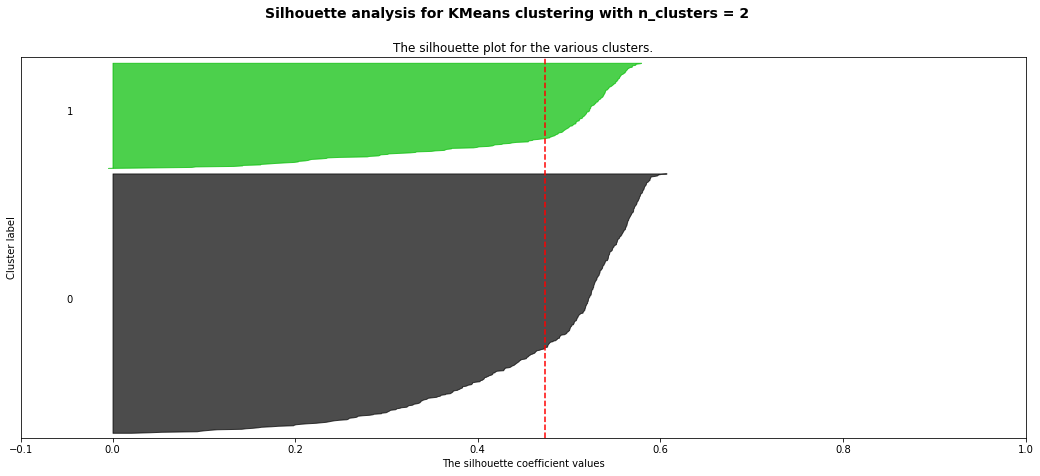

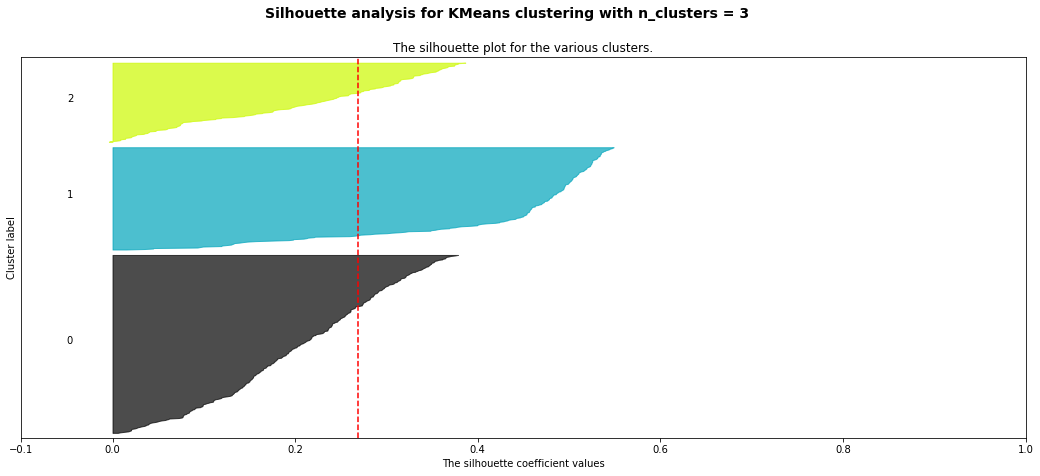

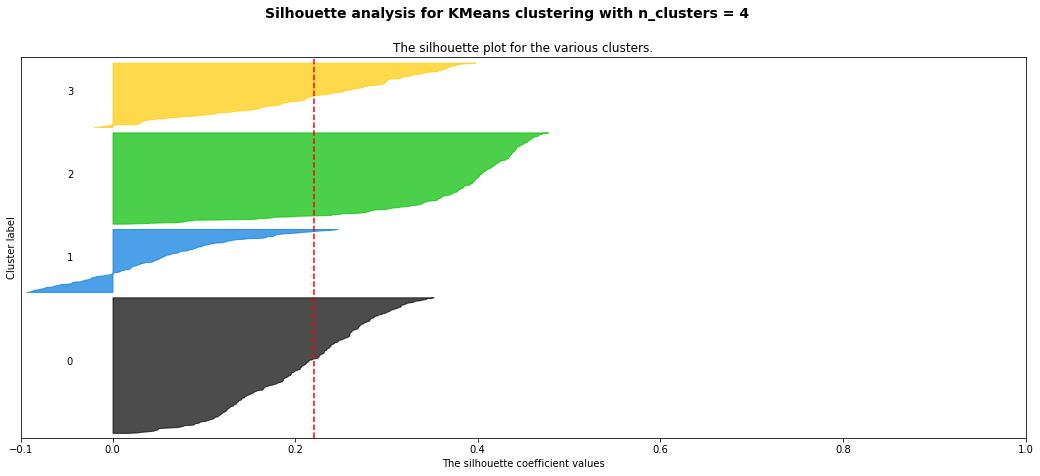

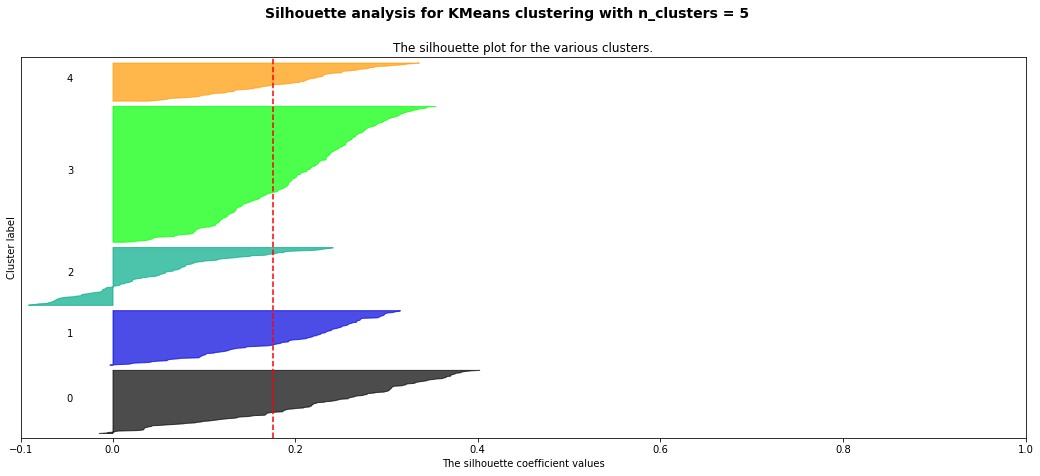

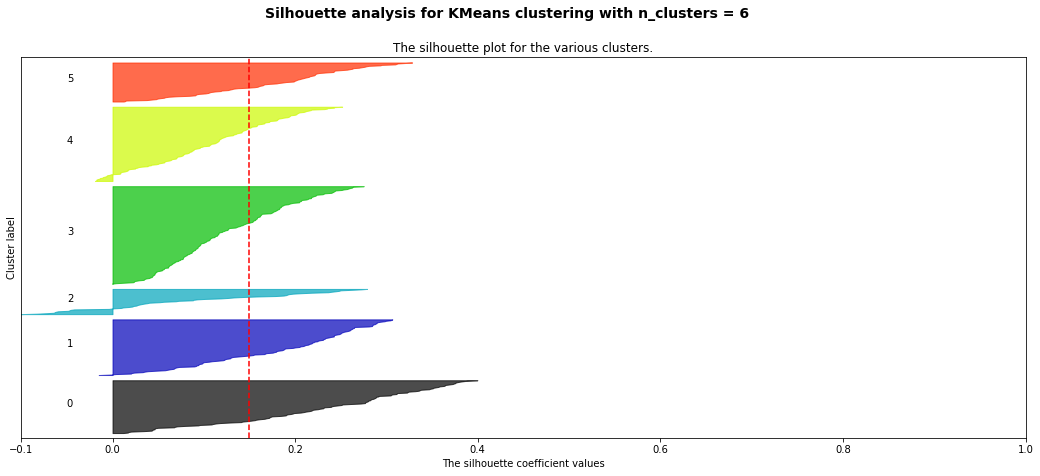

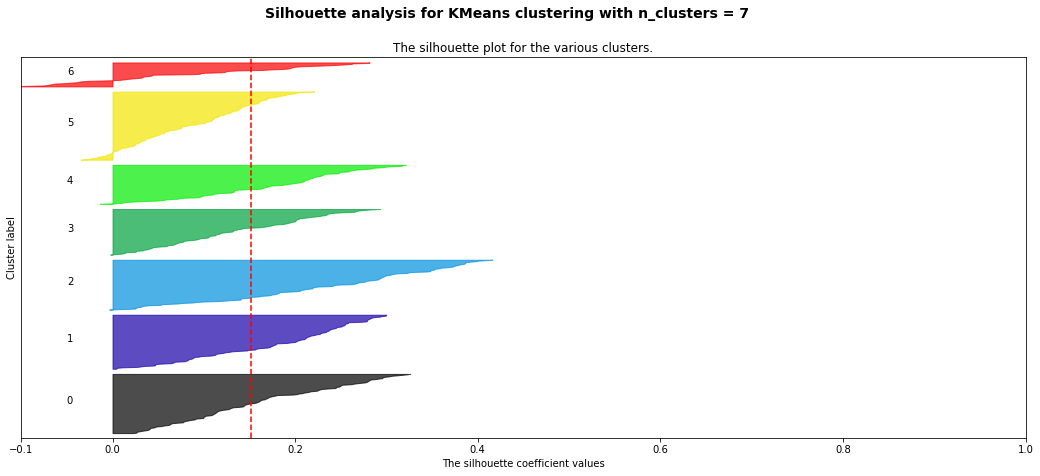

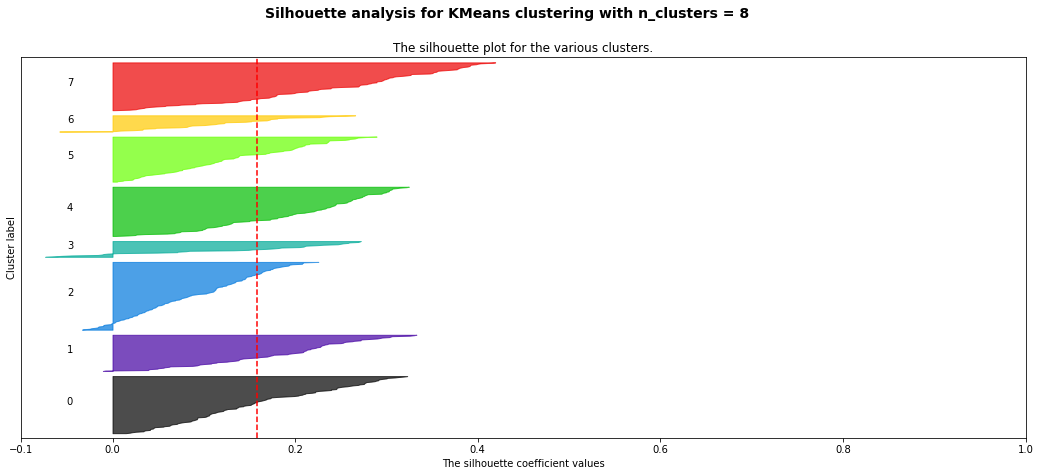

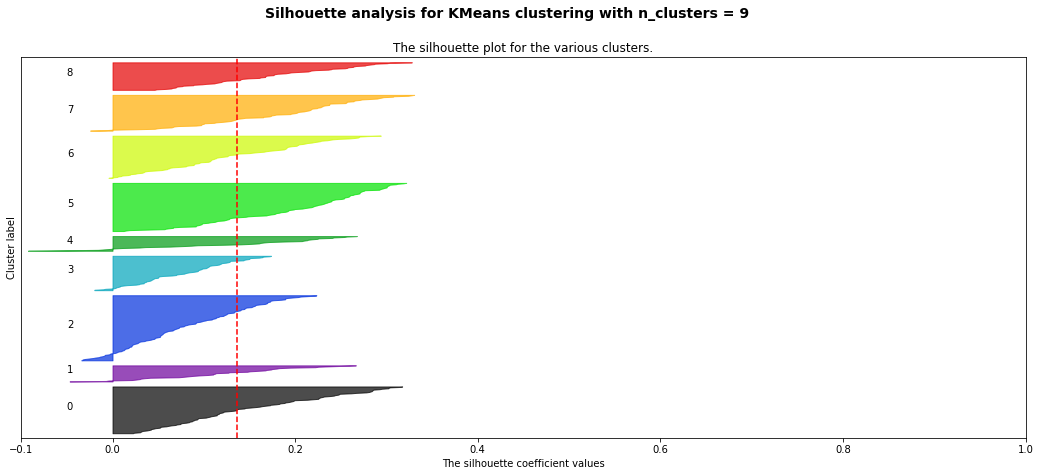

In [145]:
#Method1, using Silhouette to figure out the optimal K-value
range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
   
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


   

    # Labeling the clusters
    centers = clusterer.cluster_centers_


    for i, c in enumerate(centers):
         plt.suptitle(("Silhouette analysis for KMeans clustering "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Above silhoutte core for cluster 2 is closer to 1, optimal k is 2. optimal cluster is 2

Method2: use Elbow rule to find the optimal k value

In [146]:
#Method2: use Elbow rule to find the optimal k value
ssd2 = []
K = range(1,18)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X2)
    ssd2 .append(km.inertia_)

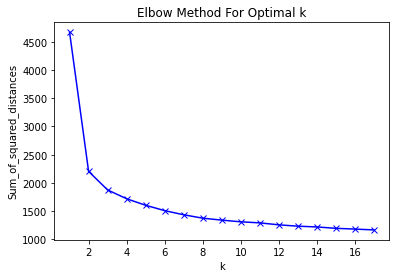

In [147]:
plt.plot(K, ssd2 , 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The optimal from elbow method, looks like 2 or 3, or 4. lets find the Silhouetter score which closer to 1

In [148]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn.metrics as metrics
km2 = KMeans(n_clusters=2, random_state=1).fit(X2)
labels = km2.labels_
metrics.silhouette_score(X2, labels, metric='euclidean')

0.47363399587647004

As we prove by elbow method, cluster 2 is the optimal clusters. Got the same conclusion with Silhouetter approach. We could use both way to find the optimal clusters

In [149]:
km2 = KMeans(n_clusters=2)
y_predict2 = km2.fit_predict(X2)
y_predict2
centers2 = km2.cluster_centers_
center2_df = pd.DataFrame(centers2).T

In [150]:
days_in_cluster0=sum(y_predict2==0)
days_in_cluster1=sum(y_predict2==1)

print("# of days in cluster 0 has ",days_in_cluster0)
print("# of days in cluster 1 has ",days_in_cluster1)

# of days in cluster 0 has  519
# of days in cluster 1 has  211


In [151]:
df2 = pd.DataFrame(X2,index = [i for i in daysyear],columns=average_curves_norm.index)#,
df2['Cluster']=y_predict2

Text(0.5, 0.98, '2 Clusters')

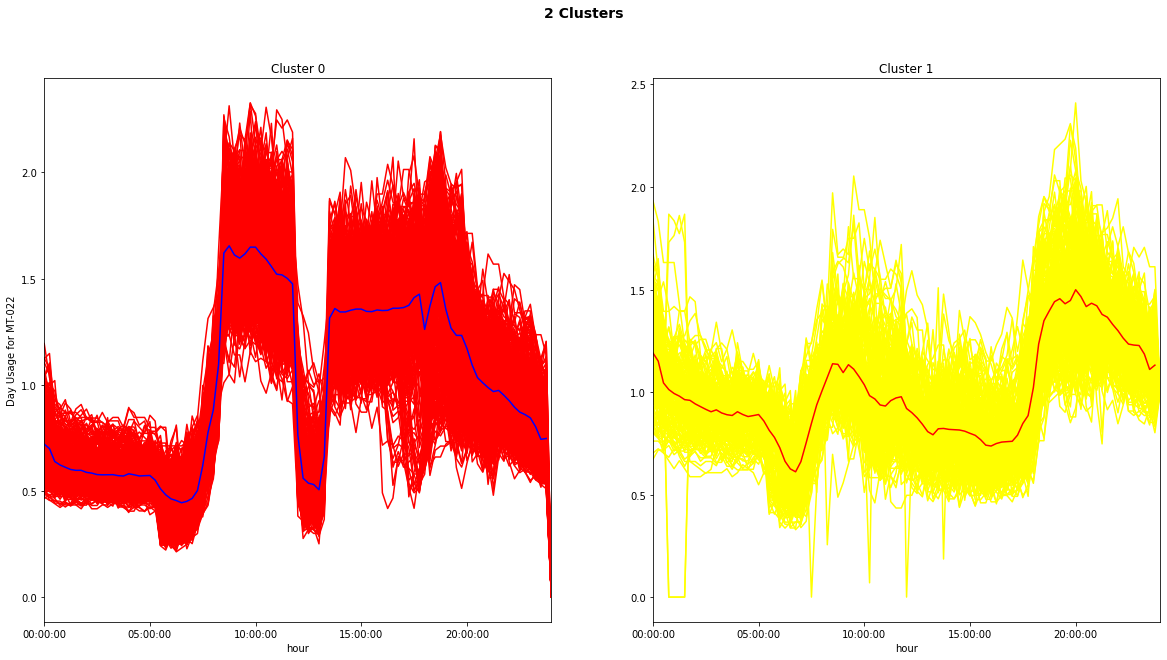

In [152]:
#Plot two clusters and centroids of daily use
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,2,1)


df2[df2['Cluster']==0].T.plot.line(color='red', legend=False, ax=ax)
center2_df[[0]].plot.line(color='blue', ax=ax, legend=False)

ax2=fig.add_subplot(1,2,2)
df2[df2['Cluster']==1].T.plot.line(color='yellow', legend=False, ax=ax2)
center2_df[[1]].plot.line(color='red', ax=ax2, legend=False)


ax.set_title("Cluster 0")
ax2.set_title("Cluster 1")
ax.set_ylabel("Day Usage for MT-022")
plt.suptitle(("2 Clusters"),
fontsize=14, fontweight='bold')


In [153]:
daysyear1 = []
date_list = [d1 +timedelta(days=x) for x in range(delta.days + 1)]

In [154]:
df3 = pd.DataFrame(X2,columns=average_curves_norm.index)
df3['Date']=date_list
df3['Date'].describe()

count            730
unique           730
top       2013-04-09
freq               1
Name: Date, dtype: object

In [155]:
#Weeks Dataset
df3['Date'] = pd.to_datetime(df3['Date'])
df4 = df3.set_index('Date').resample('W').sum()

In [156]:
#Months Dataset
df5 = df3.set_index('Date').resample('M').sum()

In [157]:
X4=df4.copy()
X4 = np.array(X4) # put it on the right format

In [158]:
X5=df5.copy()
X5 = np.array(X5) # put it on the right format

In [159]:
ssqd4 = []
K = range(1,18)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X4)
    ssqd4.append(km.inertia_)


C:\Users\jacey\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


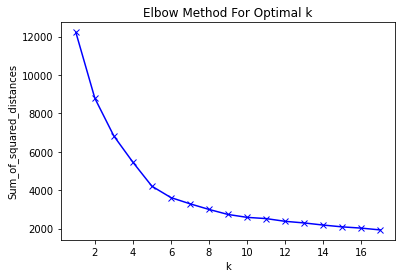

In [160]:
plt.plot(K, ssqd4, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.4554984211052584
For n_clusters = 3 The average silhouette_score is : 0.28334661693304114
For n_clusters = 4 The average silhouette_score is : 0.2763714271645419
For n_clusters = 5 The average silhouette_score is : 0.278475560647289
For n_clusters = 6 The average silhouette_score is : 0.26916306883614116
For n_clusters = 7 The average silhouette_score is : 0.24184061416674943
For n_clusters = 8 The average silhouette_score is : 0.2359161366449895
For n_clusters = 9 The average silhouette_score is : 0.22649325182277585


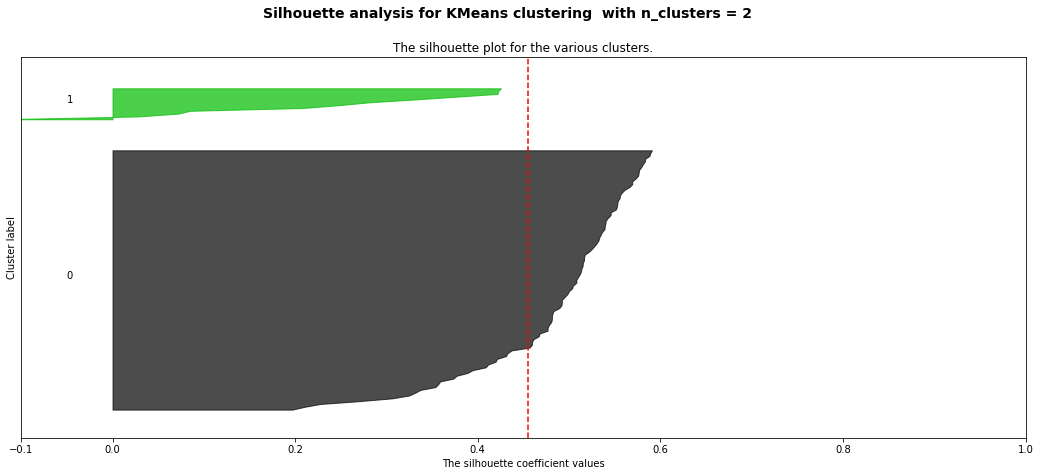

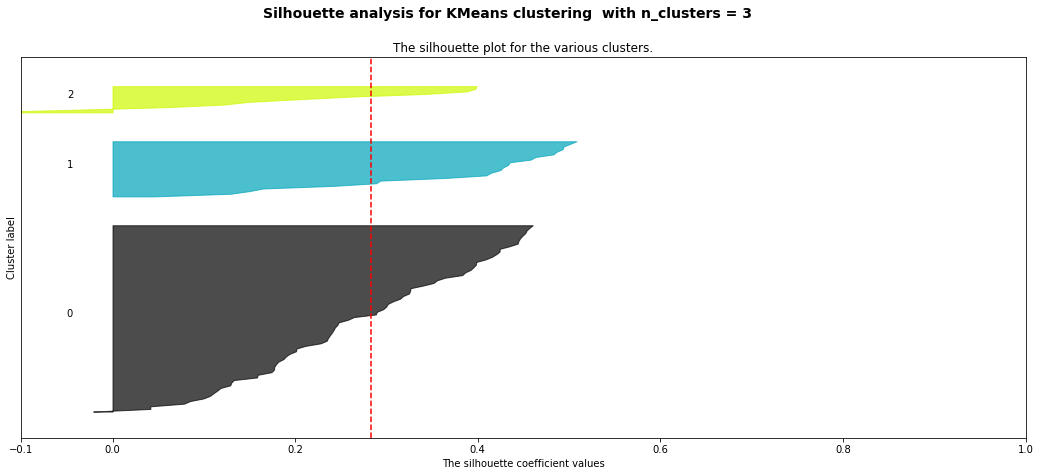

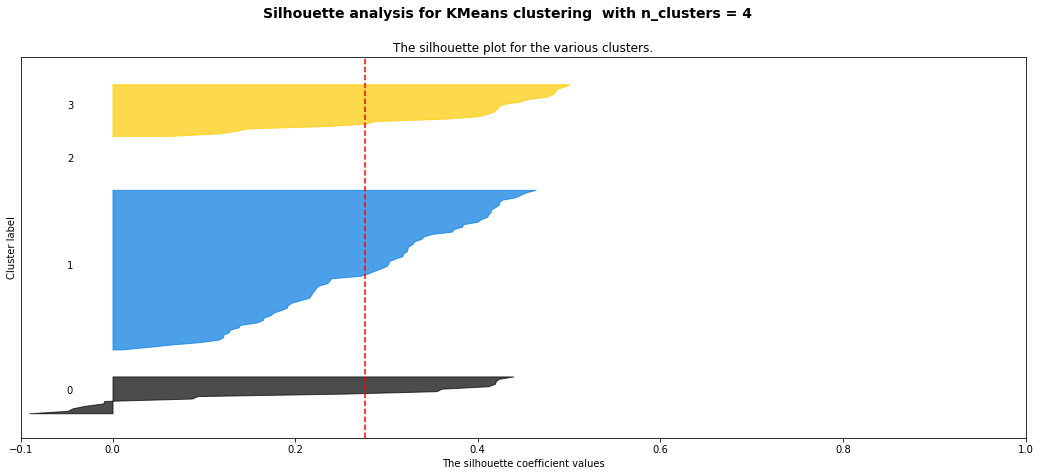

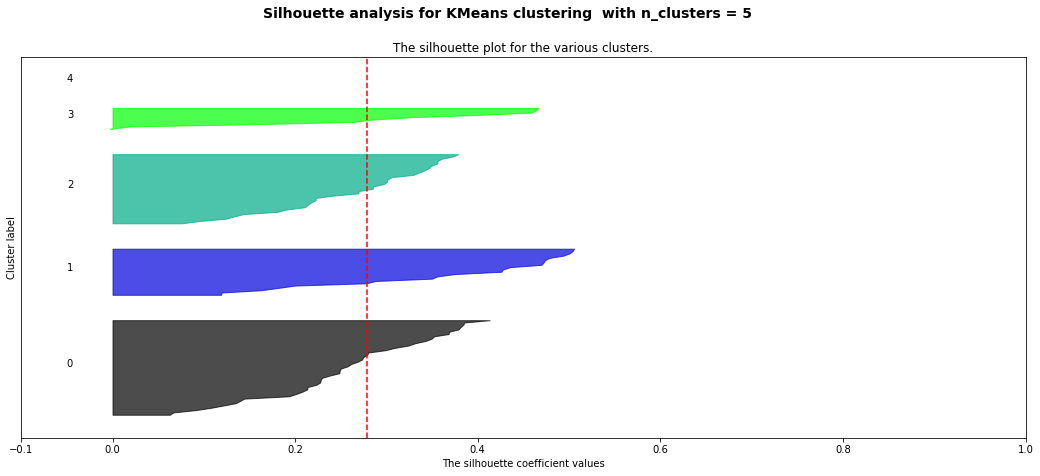

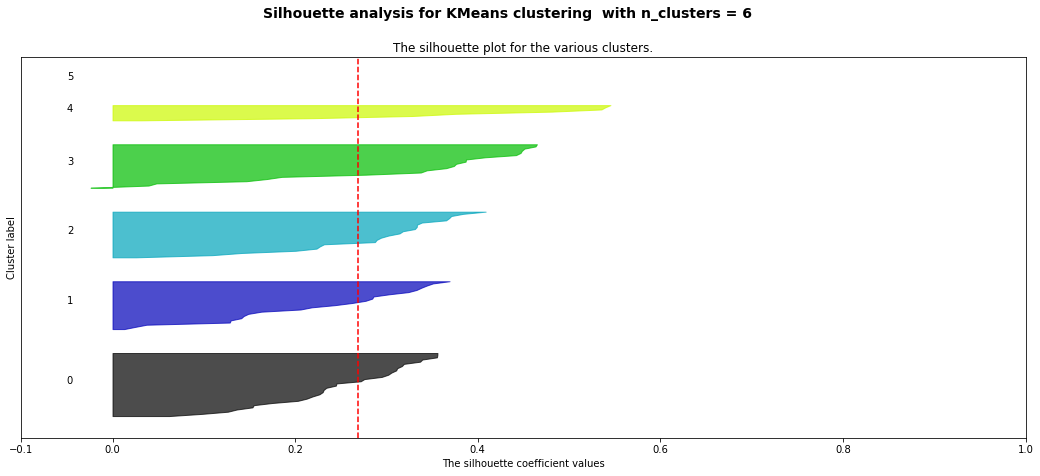

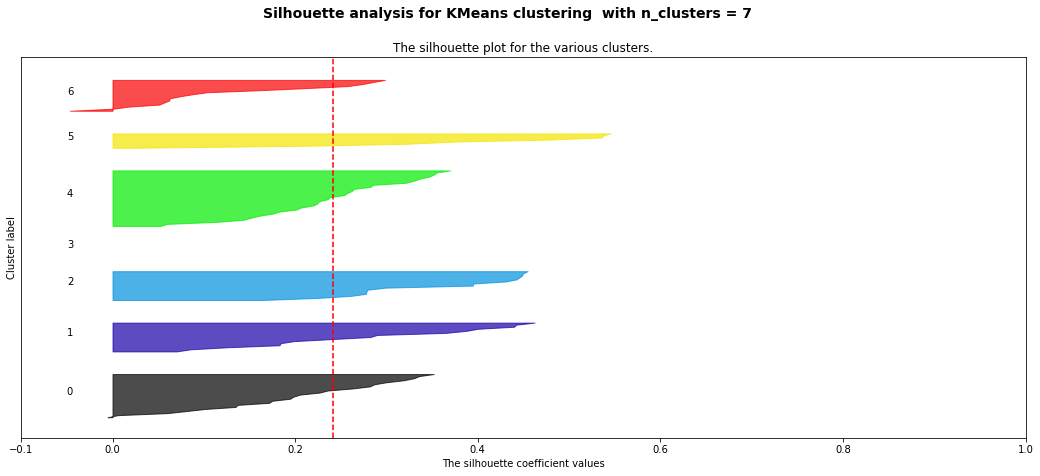

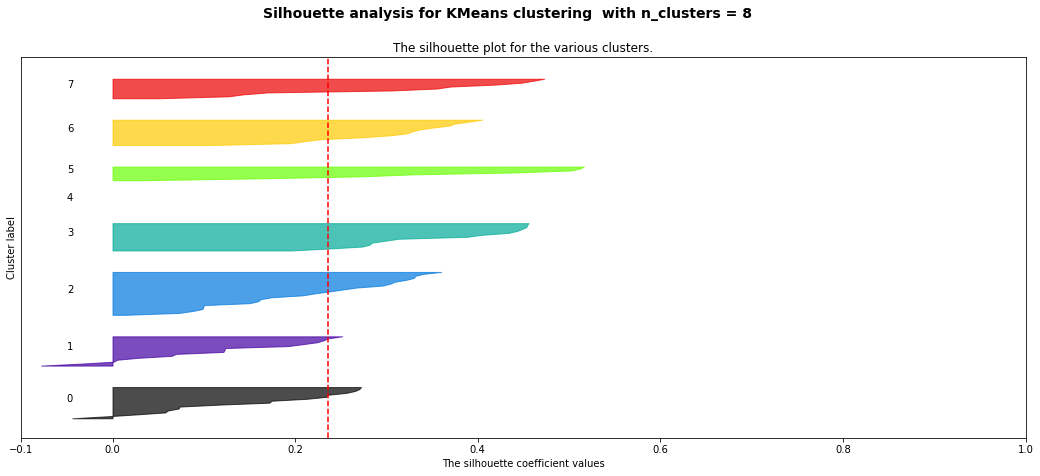

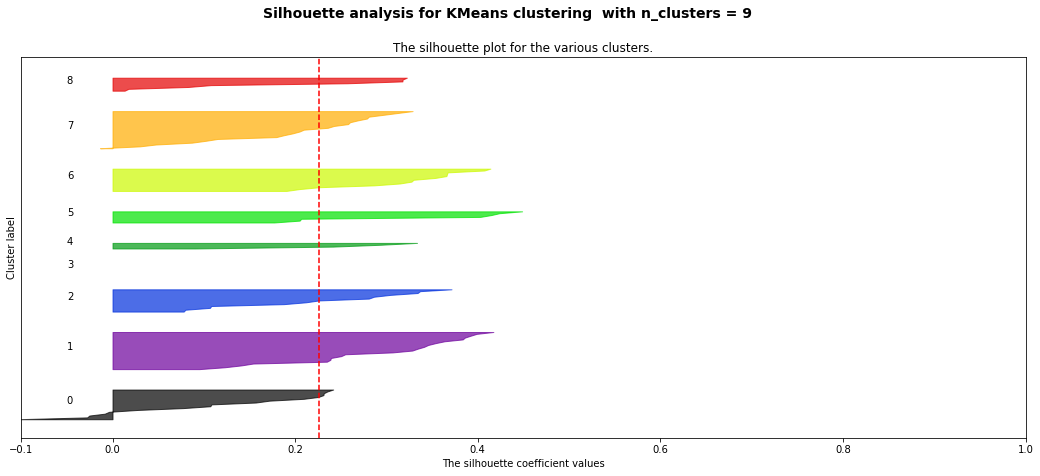

In [161]:
#Silhouette method for Weeks data to get clusters
range_n_clusters = range(2,10) ##[2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X4) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X4)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X4, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X4, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


   

    # Labeling the clusters
    centers = clusterer.cluster_centers_


    for i, c in enumerate(centers):
         plt.suptitle(("Silhouette analysis for KMeans clustering  "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

By using the same approach for weeks data, we got the same conclusion. 2 clusters for electricity usage

Text(0.5, 0.98, '2 Clusters')

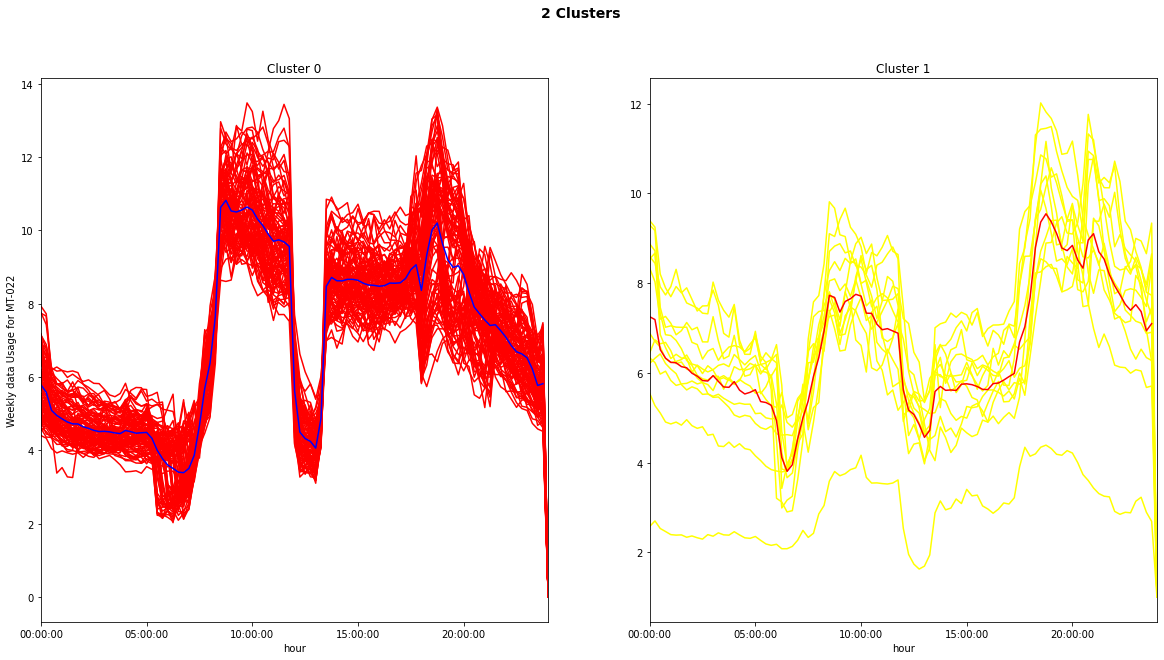

In [162]:
#Plot two clusters and centroids of Weekly data
km4 = KMeans(n_clusters=2)
y_predict4 = km4.fit_predict(X4)
y_predict4
centers4 = km4.cluster_centers_
center4_df = pd.DataFrame(centers4).T
df4['Cluster']=y_predict4
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,2,1)


df4[df4['Cluster']==0].T.plot.line(color='red', legend=False, ax=ax)
center4_df[[0]].plot.line(color='blue', ax=ax, legend=False)

ax2=fig.add_subplot(1,2,2)
df4[df4['Cluster']==1].T.plot.line(color='yellow', legend=False, ax=ax2)
center4_df[[1]].plot.line(color='red', ax=ax2, legend=False)


ax.set_title("Cluster 0")
ax2.set_title("Cluster 1")
ax.set_ylabel("Weekly data Usage for MT-022")
plt.suptitle(("2 Clusters"),
fontsize=14, fontweight='bold')


In [163]:
#Months Data

In [164]:
ssqd5 = []
K = range(1,18)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X5)
    ssqd5.append(km.inertia_)


C:\Users\jacey\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


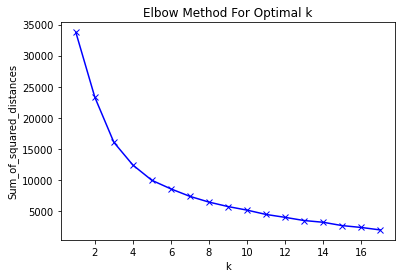

In [165]:
plt.plot(K, ssqd5, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2555925814799476
For n_clusters = 3 The average silhouette_score is : 0.30539863195549727
For n_clusters = 4 The average silhouette_score is : 0.2752511071607899
For n_clusters = 5 The average silhouette_score is : 0.27488891730007753
For n_clusters = 6 The average silhouette_score is : 0.2410758847422606
For n_clusters = 7 The average silhouette_score is : 0.2705665769112162
For n_clusters = 8 The average silhouette_score is : 0.22299550440413854
For n_clusters = 9 The average silhouette_score is : 0.23581237870924052


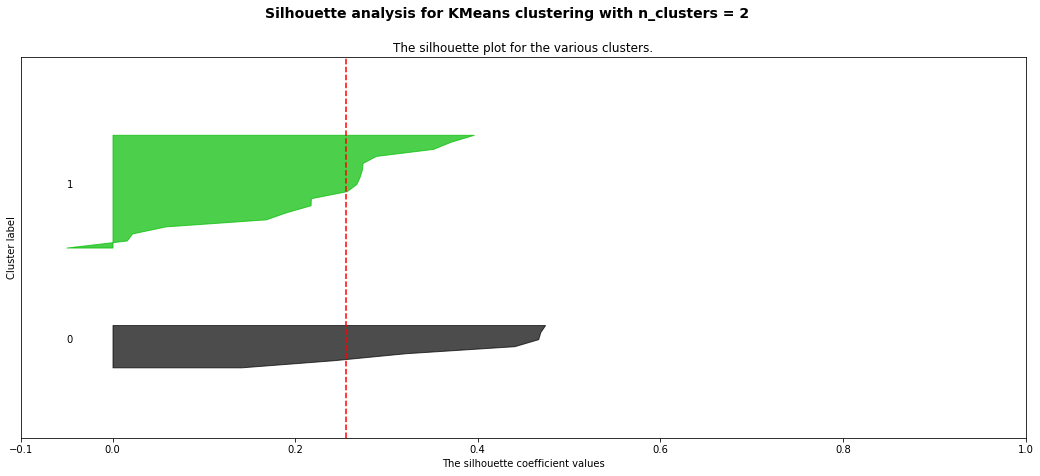

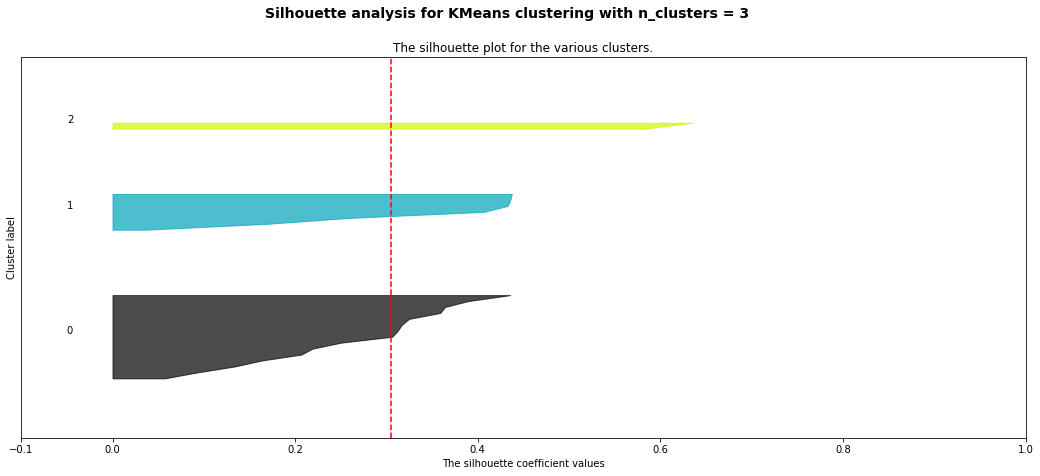

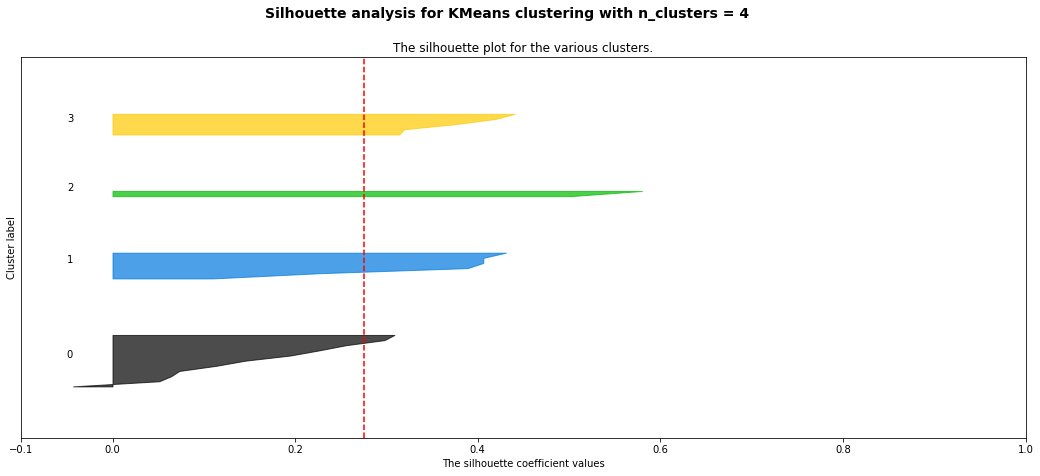

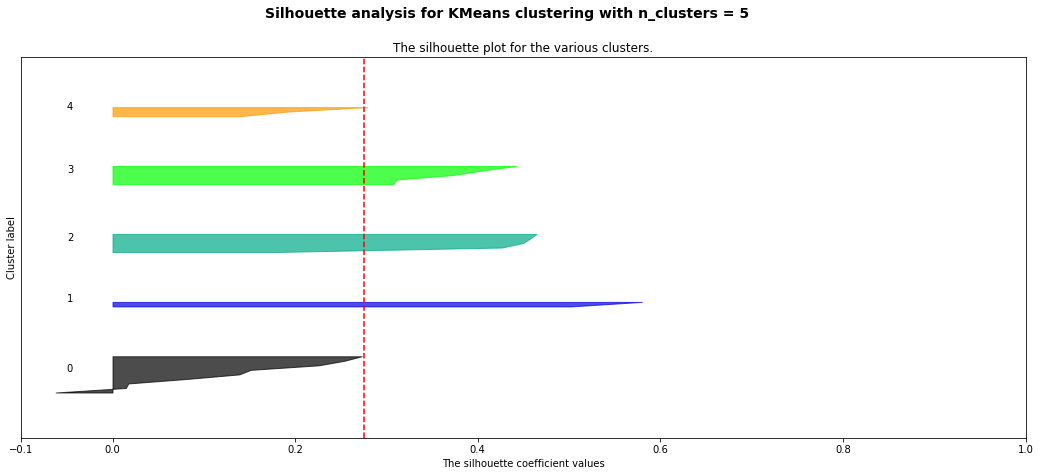

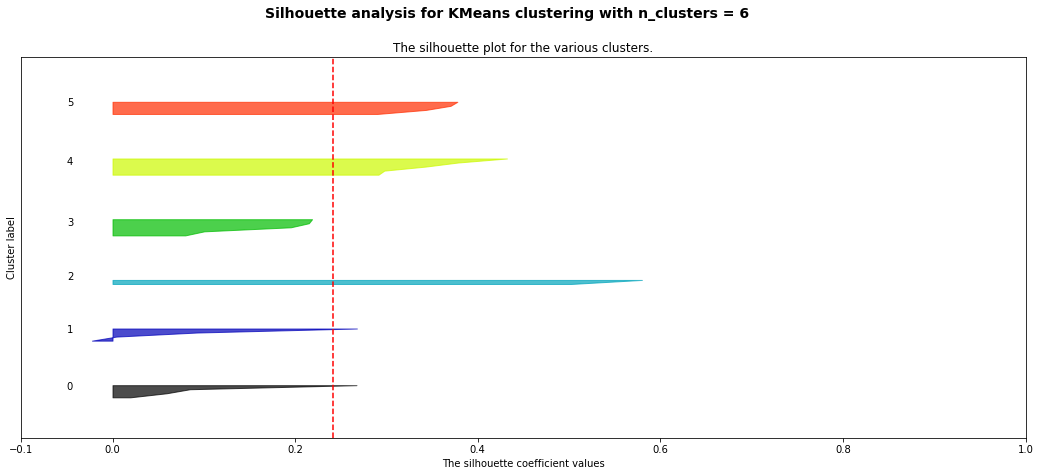

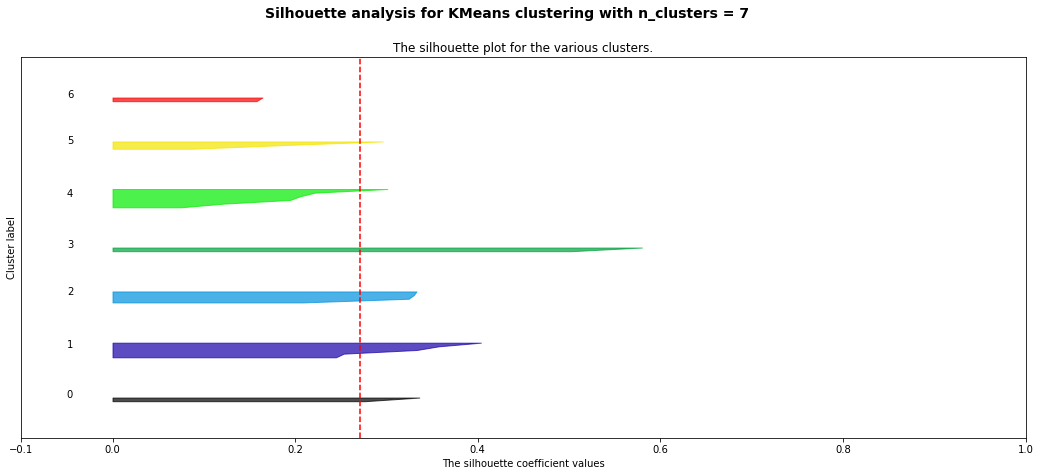

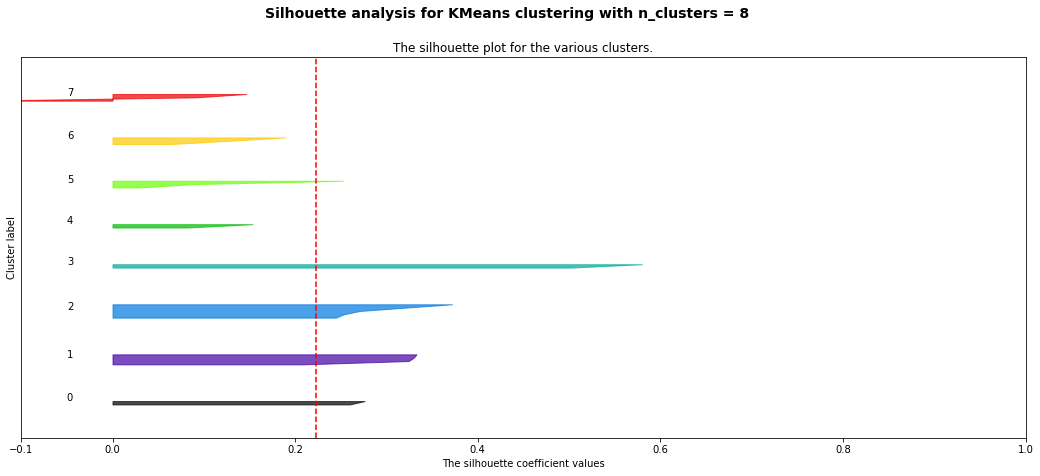

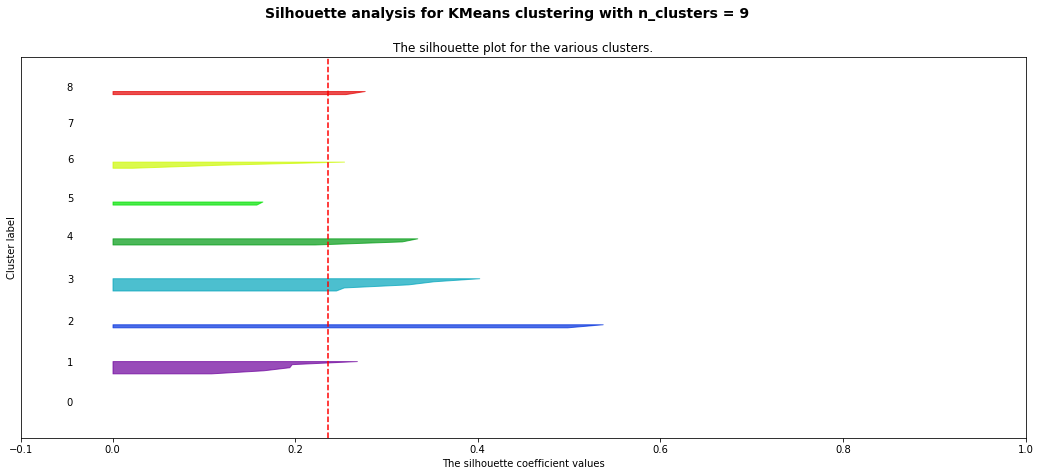

In [166]:
#Silhouette method for Months data to get clusters
range_n_clusters = range(2,10) ##[2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X5) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X5)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X5, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X5, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


   

    # Labeling the clusters
    centers = clusterer.cluster_centers_


    for i, c in enumerate(centers):
         plt.suptitle(("Silhouette analysis for KMeans clustering "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

By using the same approach for monthly data, we got the same conclusion. 2 clusters for electricity usage

Text(0.5, 0.98, '2 Clusters')

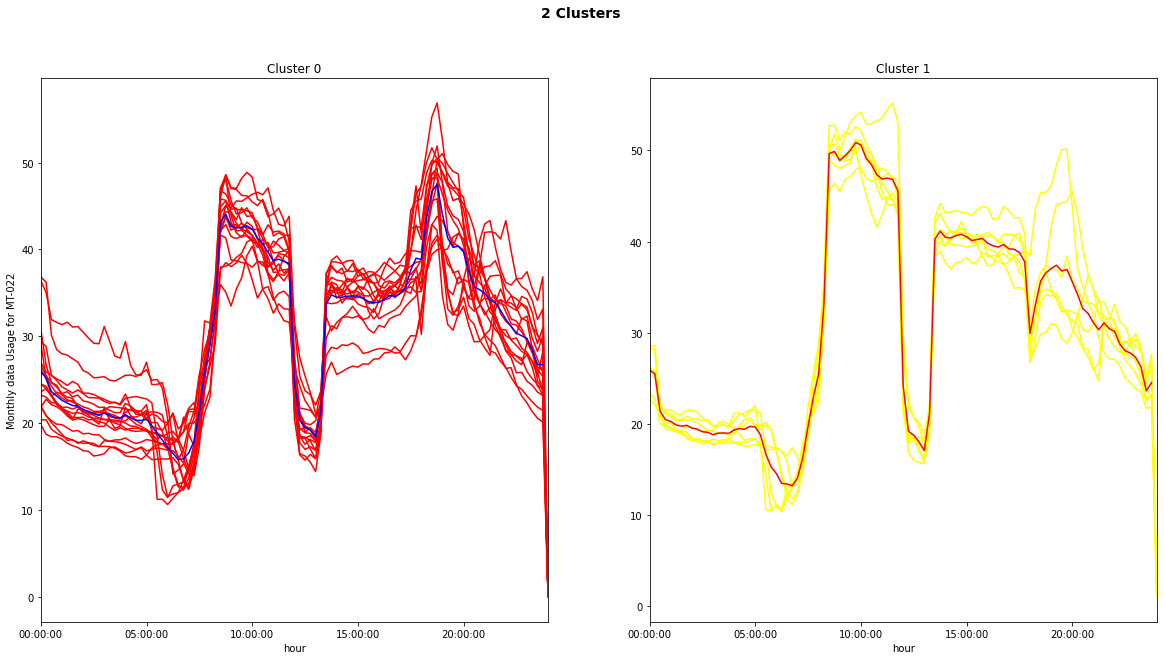

In [167]:
#Plot two clusters and centroids of Monthly data
km5 = KMeans(n_clusters=2)
y_predict5 = km5.fit_predict(X5)
y_predict4
centers5 = km5.cluster_centers_
center5_df = pd.DataFrame(centers5).T
df5['Cluster']=y_predict5
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,2,1)


df5[df5['Cluster']==0].T.plot.line(color='red', legend=False, ax=ax)
center5_df[[0]].plot.line(color='blue', ax=ax, legend=False)

ax2=fig.add_subplot(1,2,2)
df5[df5['Cluster']==1].T.plot.line(color='yellow', legend=False, ax=ax2)
center5_df[[1]].plot.line(color='red', ax=ax2, legend=False)


ax.set_title("Cluster 0")
ax2.set_title("Cluster 1")
ax.set_ylabel("Monthly data Usage for MT-022")
plt.suptitle(("2 Clusters"),
fontsize=14, fontweight='bold')

Continue with your analysis here:

Conclusion:
    By using elbow and Silhouette method, we got to have 2 clusters as optimal clusters for the usage of daily data
    
    By using elbow and Silhouette method, we got to have 2 clusters as optimal clusters for the usage of weekly data
    
    By using elbow and Silhouette method, we got to have 3 clusters as optimal clusters for the usage of monthly data
    
    Using elbow rule or Silhouette, both works and easy to find the optimal clusters.
    

#### The following cell shows you how to do the following: given a list L, and a list of booleans B (True, False), get the sublist of L that corresponds to the True values in B. For example if L=[1,2,3,4] and B=[False,True,True,False], then the results is [2,3]. This is also helpful for pard (b)

In [168]:
from itertools import compress
L = [1,2,3,4]
B = [False, True, True, False]
list(compress(L, B))

[2, 3]